# SSH Plots

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs                 
import cartopy
import gsw
import pandas as pd

In [2]:
file = '../Data/dataset-duacs-nrt(7:10:219).nc'


In [3]:
ds = xr.open_dataset(file)

In [4]:
lon, lat = np.meshgrid(ds.longitude, ds.latitude)
u = np.squeeze(ds.ugos).values
v = np.squeeze(ds.vgos).values

In [5]:
%matplotlib inline  
#%matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1

In [6]:
sla = ds.sla

/Users/lfp/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_39721/4258645917.py:16: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


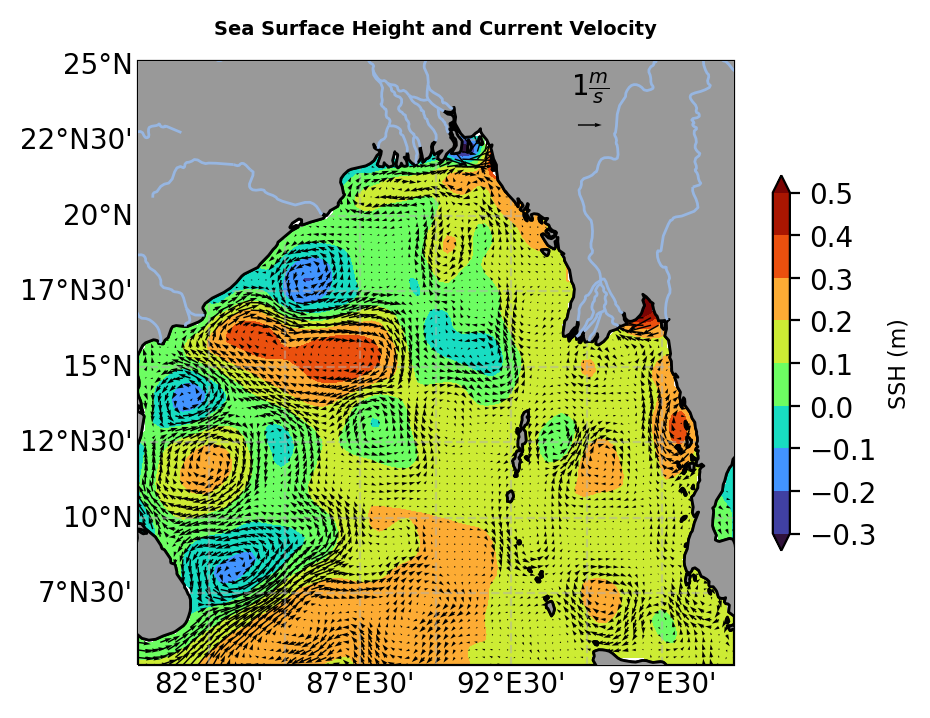

In [7]:
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('Sea Surface Height and Current Velocity', fontsize=7, fontweight='bold')

plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
    
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False

levels = 10 #related to dataframe

cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())

#cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SSH (m)',fontsize = 8)
ax.coastlines()
#Plot coast
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS,zorder=5)


q = ax.quiver(lon,lat, u, v, scale = 25, transform=ccrs.PlateCarree())
qk = ax.quiverkey(q, 0.7, 0.8, 1, r'$1 \frac{m}{s}$',labelpos='N', coordinates='figure')
qk.set(zorder=5)


#ax.set_extent([82,90,14,24]) #Set a specific location

if savefig:

    plt.savefig(__figdir__+'BoB_SLA'+'.'+plotfiletype,**savefig_args)
    